# Veri Yoğun Uygulamalar Modül Projesi: Zaman Serisi Sınıflandırma Problemi
Dr. İsmail Güzel

Milli Teknoloji Hamlesi kapsamında düzenlenen Yapay Zeka Uzmanlık Programı dahilinde, 18 saatlik Veri Yoğun Uygulamalar Eğitimi sonunda bu projenin tamamlanması beklenmektedir.

### **Proje Başlığı: Hisse Senetlerinin Sektörel Benzerlik Analizi ve Sınıflandırma Modeli Geliştirilmesi**

#### **Proje Amacı:**
Farklı sektörlerdeki hisse senetlerinin zaman serisi davranışlarını analiz ederek, bir hisse senedinin hangi sektöre daha çok benzediğini tespit etmek ve bu bilgiyi yatırım stratejileri için kullanmak.

---

#### **Proje Adımları:**

1. **Veri Toplama:**
   - `yfinance`, `investpy`, `quandl` gibi kütüphaneler kullanılarak, 2005-01-01 tarihinden itibaren aylık getirilere sahip hisse senetleri ve sektör verileri toplanacak.
   - Web scraping ile sektörlerin ve hisse senetlerinin listesi çekilecek.

2. **Veri Ön İşleme:**
   - **Boş Değer Doldurma:** Eksik veriler, ortalama, medyan veya ileri/geri doldurma (forward/backward fill) yöntemleriyle doldurulabilir.
   - **Dönüşüm Kullanma:** Zaman serisi verileri için log dönüşümü, fark alma (differencing) gibi yöntemler uygulanarak verinin durağanlık (stationary) özelliği kazanması sağlanabilir.
   - **Kategorik Değişkenlerle Çalışma:** Sektör bilgisi gibi kategorik değişkenler, one-hot encoding veya label encoding yöntemleriyle sayısal hale getirilebiilir.
   - **Ölçeklendirme:** Zaman serisi verileri ve özellikler, standardizasyon (StandardScaler) veya normalizasyon (MinMaxScaler) yöntemleriyle ölçeklendirilebilir.

3. **Öznitelik Çıkarımı ve Seçme:**
   - **Öznitelik Çıkarımı:** `tsfresh` kütüphanesi ile otomatik özellik çıkarımı yapılacak. Bu süreçte, zaman serisi verilerinden istatistiksel özellikler (ortalama, standart sapma, otokorelasyon vb.) çıkarılacak.
   - **Öznitelik Seçme:** Çıkarılan özellikler arasından en önemlileri seçmek için L1 regularization (Lasso), Recursive Feature Elimination (RFE) veya Principal Component Analysis (PCA) gibi yöntemler kullanılabilir.

4. **Model Geliştirme:**
   - **Model Seçimi:** Scikit-learn, XGBoost ve CatBoost kütüphaneleri kullanılarak Random Forest, Gradient Boosting ve XGBoost modelleri denenerek en iyi performans gösteren model seçilecek.
   - **Hiperparametre Optimizasyonu:** Grid Search veya Bayesian Optimization yöntemleriyle hiperparametre optimizasyonu yapılacak.
   - **Cross-Validation:** Modelin genelleme performansını artırmak için cross-validation yöntemleri kullanılacak.

5. **Model Değerlendirme:**
   - Doğruluk (accuracy), F1-score, ROC-AUC gibi metrikler kullanılarak model performansı değerlendirilecek.
   - Backtesting ile modelin geçmiş veriler üzerindeki performansı test edilebilir, zorunlu değildir.

6. **Sektörel Benzerlik Analizi:**
   - Bir hisse senedinin hangi sektöre daha çok benzediği tespit edilebilir.
   - Örneğin, Real-Estate sektöründeki hisse senetlerinin çoğunlukla hangi sektöre benzediği analiz edilecek.

7. **Bonus: Faktör Hesaplama ve İleri Analiz:**
   - **Faktör Hesaplama:** Model performansı orijinal seri üzerinden yeterli gelmezse, momentum, volatilite, RSI, MACD gibi finansal faktörler hesaplanabilir.
   - **Faktör Zaman Serileri Üzerinden Analiz:** Faktör zaman serileri üzerinden aynı işlemler tekrarlanarak model performansı artırılmaya çalışılabilir. Karşılaştırma yapılabilir.

8. **Sonuçların Görselleştirilmesi ve Raporlama:**
   - Zaman serisi grafikleri, sektörel benzerlik matrisleri ve model performans metrikleri görselleştirilecek.
   - Proje sonuçları detaylı bir rapor halinde sunulacak.

---

#### **Beklenen Çıktılar:**
- Hisse senetlerinin sektörel benzerliklerini gösteren bir sınıflandırma modeli.
- Farklı sektörlerdeki hisse senetlerinin davranışlarını açıklayan bir analiz raporu.
- Yatırım stratejileri için kullanılabilecek sektörel benzerlik bilgisi.

---

#### **Kullanılacak Araçlar ve Teknolojiler:**
- **Programlama Dili:** Python
- **Kütüphaneler:** `yfinance`, `investpy`, `quandl`, `tsfresh`, `scikit-learn`, `XGBoost`, `CatBoost`, `Matplotlib`, `Seaborn`, `Plotly`
- **Veri Kaynakları:** Borsa verileri, sektörel endeksler, finansal API'lar

---

#### **Proje Süresi:**
- **Tahmini Süre:** 10 gün (veri toplama, model geliştirme, test ve raporlama dahil)

#### **Proje Teslimi:** 
- E-posta: ismail.guzel@tubitak.gov.tr
- E-posta başlığı: **YZUP-VYU-Proje-isim-soyisim**
- Dosya ismi: **YZUP-VYU-Proje-isim-soyisim.ipynb**
- Drive bağlantısı paylaşabilirsiniz.

In [1]:
import yfinance
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
        df.drop(columns='No.', inplace=True)
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

In [2]:
sectors=fetch_sectors_names()
indusrty=fetch_industry_names()

In [3]:
sectors

,Sector Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Financials,1274,12.03T,0.17%,16.15,19.80%,1.13%,36.41%
1,Healthcare,1158,"8,103.02B",0.48%,61.64,3.14%,1.45%,12.15%
2,Technology,771,21.31T,0.43%,46.11,14.42%,-0.52%,44.07%
3,Industrials,663,"6,000.35B",1.17%,29.89,7.22%,1.09%,28.29%
4,Consumer Discretionary,562,"9,064.19B",0.74%,31.98,6.20%,1.38%,45.35%
5,Materials,265,"2,016.61B",1.69%,28.50,6.01%,1.65%,10.40%
6,Real Estate,263,"1,672.53B",3.78%,50.12,9.35%,2.06%,9.37%
7,Energy,252,"3,673.20B",3.12%,13.18,8.28%,1.03%,11.07%
8,Communication Services,247,"6,827.98B",1.44%,31.90,11.19%,1.02%,40.54%
9,Consumer Staples,243,"4,213.88B",1.51%,29.39,4.92%,1.18%,24.13%


## Sektör listerine erişmek

Yukarıdaki fonksiyonlar yardımıyla, hangi sembollerin hangi sektörlere ait olduğu bilgisine erişim sağlanabilir ve bu bilgiler ```.csv``` dosyalarına kaydedilebilir. Daha sonra, bu ```.csv``` dosyaları kullanılarak sektör bazlı sembollere ait veriler indirilebilir ve sınıflandırılabilir. Bu süreç, finansal analizlerde sektör bazlı karşılaştırmalar yapmak veya belirli sektörlerdeki trendleri incelemek için oldukça faydalıdır.

In [6]:
#!mkdir -p ../data/stock_sectors

In [5]:
fetch_data(sectors='energy').to_csv('../data/stock_sectors/energy.csv')
fetch_data(sectors='financials').to_csv('../data/stock_sectors/financials.csv')
fetch_data(sectors='healthcare').to_csv('../data/stock_sectors/healthcare.csv')
fetch_data(sectors='technology').to_csv('../data/stock_sectors/technology.csv')
fetch_data(sectors='utilities').to_csv('../data/stock_sectors/utilities.csv')
fetch_data(sectors='real-estate').to_csv('../data/stock_sectors/real-estate.csv')
fetch_data(sectors='materials').to_csv('../data/stock_sectors/materials.csv')
fetch_data(sectors='technology').to_csv('../data/stock_sectors/technology.csv')
fetch_data(sectors='industrials').to_csv('../data/stock_sectors/industrials.csv')
fetch_data(sectors='consumer-staples').to_csv('../data/stock_sectors/consumer-staples.csv')
fetch_data(sectors='consumer-discretionary').to_csv('../data/stock_sectors/consumer-discretionary.csv')
fetch_data(sectors='communication-services').to_csv('../data/stock_sectors/communication-services.csv')

In [6]:
finance = pd.read_csv('../data/stock_sectors/financials.csv')
finance.Symbol

0      BRK.B
1        JPM
2          V
3         MA
4        BAC
       ...  
872     NCPL
873     RELI
874     LGHL
875      DXF
876     BENF
Name: Symbol, Length: 877, dtype: object

## Veriye Erişmek

Diyelim ki, finans sektöründen **`HSBC`** sembolü için verileri indirmek istiyoruz. Bu işlem için **`yfinance`** kütüphanesini kullanabiliriz. Aşağıdaki adımları takip ederek veriye erişim sağlayabiliriz:

1. **Ticker Nesnesi Oluşturma**: İlk olarak, `yfinance` kütüphanesindeki `.Ticker` fonksiyonunu kullanarak bir obje oluşturabiliriz. Bu obje, ilgili sembolün (örneğin `HSBC`) verilerine erişim sağlar. Ayrıca, bu adımda sembolün doğru olup olmadığını teyit edebiliriz.

2. **Metadata Erişimi**: `.get_history_metadata()` fonksiyonu ile sembolün geçmişine ve diğer temel bilgilerine erişim sağlayabiliriz. Bu, sembolün geçerliliğini ve geçmiş performansını kontrol etmek için faydalıdır.

3. **Tarihsel Veriyi İndirme**: `.history(period='3y')` fonksiyonu ile son 3 yıla ait tarihsel fiyat verilerini indirebiliriz. Bu veri, kapanış fiyatları, hacim, en yüksek ve en düşük fiyatlar gibi bilgileri içerir.

In [7]:
import yfinance
ticker_name = yfinance.Ticker("HSBC")
ticker_name.info

{'address1': '8 Canada Square',
 'city': 'London',
 'zip': 'E14 5HQ',
 'country': 'United Kingdom',
 'phone': '44 20 7991 8888',
 'fax': '44 20 7992 4880',
 'website': 'https://www.hsbc.com',
 'industry': 'Banks - Diversified',
 'industryKey': 'banks-diversified',
 'industryDisp': 'Banks - Diversified',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'HSBC Holdings plc provides banking and financial services worldwide. The company operates through Wealth and Personal Banking, Commercial Banking, and Global Banking and Markets segments. The Wealth and Personal Banking segment offers retail banking and wealth products, including current and savings accounts, mortgages and personal loans, credit and debit cards, and local and international payment services; and wealth management services comprising insurance and investment products, global asset management services, investment management, and private wealth 

In [71]:
ticker_name.get_history_metadata()

{'currency': 'USD',
 'symbol': 'HSBC',
 'exchangeName': 'NYQ',
 'fullExchangeName': 'NYSE',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 932131800,
 'regularMarketTime': 1738184402,
 'hasPrePostMarketData': True,
 'gmtoffset': -18000,
 'timezone': 'EST',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 52.16,
 'fiftyTwoWeekHigh': 52.44,
 'fiftyTwoWeekLow': 36.93,
 'regularMarketDayHigh': 52.44,
 'regularMarketDayLow': 51.87,
 'regularMarketVolume': 1435896,
 'longName': 'HSBC Holdings plc',
 'shortName': 'HSBC Holdings, plc.',
 'chartPreviousClose': 51.41,
 'previousClose': 51.96,
 'scale': 3,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EST',
   'end': 1738247400,
   'start': 1738227600,
   'gmtoffset': -18000},
  'regular': {'timezone': 'EST',
   'end': 1738270800,
   'start': 1738247400,
   'gmtoffset': -18000},
  'post': {'timezone': 'EST',
   'end': 1738285200,
   'start': 1738270800,
   'gmtoffset': -18000}},
 'tradingPeriods':            

In [9]:
data=ticker_name.history(period='2y')
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-24 00:00:00-05:00,51.209999,51.419998,51.049999,51.290001,986900,0.0,0.0
2025-01-27 00:00:00-05:00,52.000000,52.139999,51.730000,52.099998,1588400,0.0,0.0
2025-01-28 00:00:00-05:00,51.630001,52.000000,51.580002,51.959999,1324000,0.0,0.0
2025-01-29 00:00:00-05:00,51.869999,52.439999,51.869999,52.160000,1523800,0.0,0.0
2025-01-30 00:00:00-05:00,52.639999,52.970001,52.485001,52.904999,836264,0.0,0.0


Şimdi ise, belirlenen sembollerin verilerini belirli bir tarihten itibaren çekebiliriz. Daha sonra, bu veriler **tsfresh** paketi kullanımı için uygun bir formata dönüştürülerek, özellik mühendisliği işlemlerine başlanabilir. Ek olarak, verinin kendisiyle oluşturulan model performansını iyileştirmek amacıyla farklı özellik mühendisliği çalışmaları tamamlandıktan sonra, istenilen performansa ulaşılamadığı durumda serinin orijinal değerleri yerine, göstergeler(indicators) üzerinden elde edilen serilerle bir çalışma planlanabilir. Örneğin, aylık getiriler hesaplanabilir. Proje kapsamında bu yöntem, bonus puan olarak değerlendirilecektir.

In [16]:
ticker_list=['AAPL', 'NVDA', 'INTC', 'ORCL', 'SONY']
data = yfinance.download(ticker_list, start='2005-01-01')
data_close=data[['Close']]
data_close.columns = ['_'.join(col) for col in data_close.columns]# MultiIndex to SingleIndex
data_monthly_mom=data['Close'].resample('ME').last().pct_change()+1

[*********************100%***********************]  5 of 5 completed


In [11]:
data_close

,Close_AAPL,Close_INTC,Close_NVDA,Close_ORCL,Close_SONY
Date,,,,,
2005-01-03,0.953360,13.334909,0.180207,10.830472,4.927581
2005-01-04,0.963151,13.069025,0.171724,10.547797,4.837202
2005-01-05,0.971586,12.941855,0.173329,10.580103,4.830838
2005-01-06,0.972339,12.982323,0.171648,10.677018,4.821926
2005-01-07,1.043137,13.178851,0.168361,10.765859,4.865207
...,...,...,...,...,...
2025-01-24,222.779999,20.830000,142.619995,183.600006,20.830000
2025-01-27,229.860001,20.290001,118.419998,158.279999,21.000000
2025-01-28,238.259995,19.799999,128.990005,164.000000,21.809999


In [12]:
# Basit Hareketli Ortalama (SMA) hesaplama
window = 14
df_SMA= data_close.rolling(window).mean()
df_SMA

,Close_AAPL,Close_INTC,Close_NVDA,Close_ORCL,Close_SONY
Date,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN
2005-01-04,NaN,NaN,NaN,NaN,NaN
2005-01-05,NaN,NaN,NaN,NaN,NaN
2005-01-06,NaN,NaN,NaN,NaN,NaN
2005-01-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-01-24,233.344285,20.341429,140.022144,166.145619,20.702143
2025-01-27,232.379999,20.322143,138.161429,165.600462,20.679286
2025-01-28,231.898570,20.317143,136.701430,165.508765,20.744286


<Axes: xlabel='Date'>

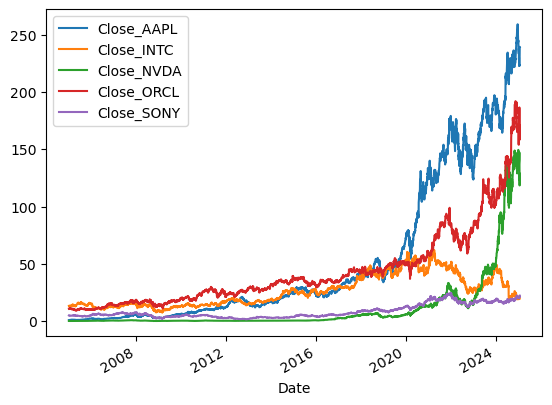

In [13]:
data_close.plot()

<Axes: xlabel='Date'>

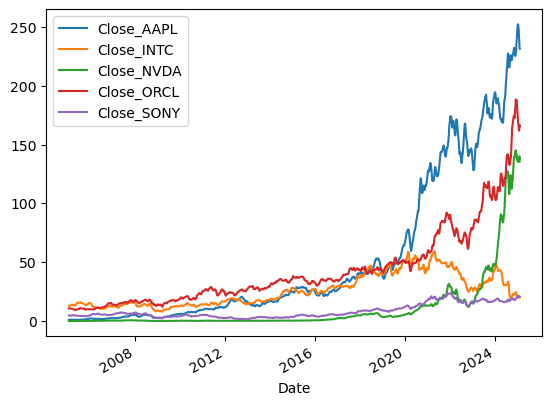

In [14]:
df_SMA.plot()

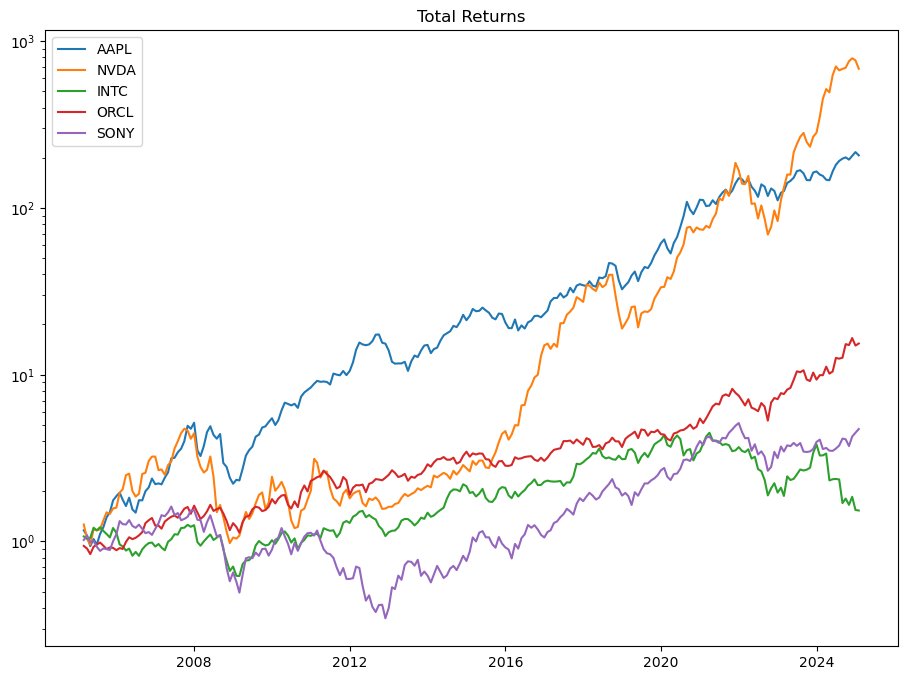

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])

for ticker in ticker_list:
    plt.plot(data_monthly_mom[ticker].cumprod(), label = ticker)

plt.yscale('log')
plt.title('Total Returns')
plt.legend()
plt.show()